In [34]:
import cv2
#import pandas as pd

import numpy as np
# 2cm x 2cm


In [35]:
not_detect_imgs = []
corners_dict = {}
for idx in range(1,26): # testing first two imgs
    img = cv2.imread(f"img{idx}.jpg")
    img = np.uint8(img)
    gray_scaled_img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)

    ans, corners= cv2.findChessboardCorners(gray_scaled_img, patternSize= (9,6))
    if ans is False:
        not_detect_imgs.append(idx)
    else:
        corners_dict[idx] = corners
    #print(len(corners))
    
    
    #print(corners)
    # x = corners[0][0]
    # y = corners[0][1]
    # print(f"x: {x}, y: {y}")
    # print("ans", ans)
    # print('corner:', corners)
    # print('------------')

# print(not_detect_imgs)
# print(corners_dict)

print(not_detect_imgs)

[1, 4, 5, 6, 10, 12, 13, 19, 20]


In [36]:

for corners in corners_dict.values():
    for coords in corners: #2621. 2016.5
        #print(i[0])
        x = coords[0][0]
        y = coords[0][1]
        print(x,y)
        center = (int(x), int(y))
        print(center)
        break

544.97595 316.93356
(544, 316)
610.4357 336.41296
(610, 336)
602.717 356.7525
(602, 356)
627.7335 378.20477
(627, 378)
608.5 427.0
(608, 427)
601.5 171.5
(601, 171)
551.50494 238.26869
(551, 238)
558.17255 157.28372
(558, 157)
704.89825 227.15437
(704, 227)
703.5418 299.07608
(703, 299)
610.5784 289.06122
(610, 289)
551.0498 374.34402
(551, 374)
555.0785 355.52313
(555, 355)
519.7551 392.36423
(519, 392)
637.2728 403.72522
(637, 403)
641.91614 278.5898
(641, 278)


In [37]:
for i in corners_dict.values(): # checking amount of corners in img2
    print(len(i))

54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54


In [ ]:

# square_size = 0.02 #2 cm
# obj_pts = np.zeros((9*6, 3), np.float32)
# obj_pts[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) * square_size


# all_obj_pts = []
# all_img_pts = []

# auto_only_imgs = []

# manual_only_imgs = []

# def click_event(event, x, y, flags, param):
#     current_img = param['img']
#     current_name = param['name']
#     if event == cv2.EVENT_LBUTTONDBLCLK:
#         print(x,y) # coordinate
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(current_img, f'{x}, {y}', (x,y), font, 1, (255,0,0), 2)
#         cv2.imshow(window_name, current_img)
#         param['point'].append([x,y])
    
#     if event == cv2.EVENT_RBUTTONDBLCLK:
#         print(x,y)
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         b,g,r = current_img[y,x] 
#         cv2.putText(img,f'{b}, {g}, {r}', (x,y), font, 1, (255, 255,0), 2)
#         cv2.imshow(window_name, current_img)
#         #points += [x,y]

#     print(f"Manual Points: {param['point']}")



# # linear interpolation
# def linear_interpolation(pts, pattern_size):
#     tl, tr, br, bl = np.array(pts[0],dtype = 'float32'),  np.array(pts[1],dtype = 'float32'), np.array(pts[2],dtype = 'float32'), np.array(pts[3],dtype = 'float32')
#     #print(type(tl))
#     cols, rows = pattern_size
#     print(cols)
#     grid = []
#     for row in range(rows):
#         ver_int = row / (rows - 1)
#         row_start = (1 - ver_int) * tl + ver_int * bl
#         row_end = (1 - ver_int)*  tr + ver_int * br
        
#         for col in range(cols):
#             hor_int = col / (cols -1)
#             point = (1 - hor_int) * row_start + hor_int * row_end
#             grid.append(point)
#     return np.array(grid, dtype= 'float32').reshape(-1, 1, 2)

# pattern_size = (9,6)

# window_name = 'chessboard_tool'
# all_result = {}
# # read input image
# for idx in range(1,26):

#     img = cv2.imread(f'img{idx}.jpg')

# # convert the input image to a grayscale
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#     # Find the chess board corners
#     ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
#     print(corners)
#     # if chessboard corners are detected
#     if ret == True:
    
#         # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (9,6), corners,ret)
#         all_img_pts.append(corners)
#         auto_only_imgs.append(corners)
#         all_obj_pts.append(obj_pts)

#         cv2.imshow(window_name,img)
#         cv2.waitKey(0)

#     elif ret == False:
#         # clicking (TL -> TR -> BR -> BL)
#         manual_pts = []
#         cv2.imshow(window_name, img)
#         cv2.setMouseCallback(window_name, click_event, param= {'img': img, 'name': f'Image{idx},', 'point':manual_pts})
#         cv2.waitKey(0)

#         if len(manual_pts) == 4:
#             interpolated_corners = linear_interpolation(manual_pts, (9,6))
#             all_img_pts.append(interpolated_corners)
#             manual_only_imgs.append(interpolated_corners)
#             all_obj_pts.append(obj_pts)

#             img_vis = img.copy()
#             cv2.drawChessboardCorners(img_vis, (9,6), interpolated_corners, True)
#             cv2.imshow(window_name, img_vis)
#             print("Showing interpolated grid. Press any key to continue to next image.")
#             cv2.waitKey(0) # Wait again so you can actually see the result
        
#         else:
#             print(f"Warning: Only {len(manual_pts)} points clicked. Skipping image {idx}.")
    
# cv2.destroyWindow(window_name)



In [39]:
#print(manual_only_imgs)
import joblib

square_size = 0.02 #2 cm
obj_pts = np.zeros((9*6, 3), np.float32)
obj_pts[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) * square_size
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
all_obj_pts = joblib.load('obj_points.joblib')
all_img_pts = joblib.load('img_points.joblib')
auto_only_imgs = joblib.load('auto_points.joblib')
manual_only_imgs = joblib.load('manual_points.joblib')

def calibrate(object_list, img_list, gray_img):

    ret, matrix, distort, rvecs, tvec = cv2.calibrateCamera(object_list, img_list, gray_img, None, None, flags = 0)

    return ret, matrix, distort, rvecs, tvec

#Run 1: All Images

ret1, matrix1, distort1, rvecs1, tvec1 = calibrate(all_obj_pts, all_img_pts, gray.shape[::-1] )

#Run 2: Only Five images each
run2_imgs = auto_only_imgs[:5] + manual_only_imgs[:5]

object_10 = [obj_pts]*10

ret2, matrix2, distort2, rvecs2, tvec2 = calibrate(object_10, run2_imgs, gray.shape[::-1] )

#Run 3: Automatic 5 images

run3_imgs = auto_only_imgs[:5] 

object_5_3 = [obj_pts]*5

ret3, matrix3, distort3, rvecs3, tvec3 = calibrate(object_5_3, run3_imgs, gray.shape[::-1] )


#rt_total = [(rvecs1, tvec1, 'Run 1'), (rvecs2, tvec2, 'Run2'), (rvecs3, tvec3, 'Run 3')]
runs = [(matrix1, distort1, "Run 1"), (matrix2, distort2, "Run 2"), (matrix3, distort3, "Run 3")]

In [40]:
axis = np.float32([[0.06, 0 ,0], [0, 0.06, 0], [0, 0,-0.06]]).reshape(-1,3)
#print(rt_total)
#cube: 8 corners

s = 0.04

cube_points = np.float32([[0,0,0], [s,0,0], [s,s,0], [0,s,0], [0,0,-s], [s,0,-s], [s,s,-s], [0,s,-s]])

for matrix, distort, label in runs:
    test_img = cv2.imread('test.jpg')
    test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    
    ret_test, test_corners = cv2.findChessboardCorners(test_gray, (9,6), None)
    origin_pixel = tuple(test_corners[0].ravel().astype(int))

    ret, rvec, tvec= cv2.solvePnP(obj_pts, test_corners, matrix, distort)

    #We want to project the axis onto image
    imgpoints_axis, _ = cv2.projectPoints(axis, rvec, tvec, matrix, distort)

    imgpoints_cube, _ = cv2.projectPoints(cube_points, rvec, tvec, matrix, distort)
    #print('imgpoints_cube:', imgpoints_cube)
    # Convert your projected points to integers for drawing
    axis_pix = imgpoints_axis.reshape(-1, 2).astype(int)
    cube_pix = imgpoints_cube.reshape(-1, 2).astype(int)
    #print('cube_pix:', cube_pix)


    # create polygon
    #chaning color of polygon based on orientation and position
    ori_var, pos_var = rvec, tvec
    rotate_intensity = np.linalg.norm(ori_var) #calculate the norm of a matrix
    ori_color = int(min(255, rotate_intensity*50)) # the ori_color can range from 0 to 255

    trans_distance = np.linalg.norm(pos_var)
    trans_color = int(min(255, trans_distance* 50))
    
    top_plane_pts = cube_pix[4:8]
    #print(top_plane_pts)
    cv2.fillConvexPoly(img = test_img, points= top_plane_pts, color = (trans_color, ori_color,  255))
    top_center_3d = np.float32([[s/2, s/2, -s]]) #3d coord
    center_pt,_ = cv2.projectPoints(top_center_3d, rvec, tvec, matrix, distort)
    center_pixel = tuple(center_pt.reshape(-1,2)[0].ravel().astype(int))
    print(f'center_pixel: {center_pixel}')
    print(f'top center point of the polygon is: {center_pt}')
    cv2.circle(test_img, center_pixel, 5, (0,0,255), 1)
    #distance
    R, _ = cv2.Rodrigues(rvec) #convert rvec into rMatrix return(Rotation_matrix, Jaccobian)
    cam_pt = np.dot(R, top_center_3d.T)+  tvec
    cam_distance = np.linalg.norm(cam_pt)
    print(f'cam_pt:{cam_pt}')
    print(f'cam_distance: {cam_distance}')


    
    # Draw 3 axies
    cv2.line(test_img, origin_pixel, tuple(axis_pix[0]), (0, 0, 255 ), 5)
    cv2.line(test_img, origin_pixel, tuple(axis_pix[1]), (0, 255, 0), 5)
    cv2.line(test_img, origin_pixel, tuple(axis_pix[2]), (255, 0, 0), 5)
    
    #  pillars of the cube
    cv2.line(test_img, tuple(cube_pix[0]), tuple(cube_pix[4]), (0, 0, 0), 2)
    cv2.line(test_img, tuple(cube_pix[1]), tuple(cube_pix[5]), (0, 0, 0), 2)
    cv2.line(test_img, tuple(cube_pix[2]), tuple(cube_pix[6]), (0, 0, 0), 2)
    cv2.line(test_img, tuple(cube_pix[3]), tuple(cube_pix[7]), (0, 0, 0), 2)

    #connect the corners
    cv2.polylines(test_img, [cube_pix[0:4]], True, (0, 0, 0), 2)
    cv2.polylines(test_img, [cube_pix[4:8]], True, (0, 0, 0), 2)

    
    cv2.circle(test_img, center_pixel, 5, (0, 0, 255), -1) 
    cv2.putText(test_img, f"{cam_distance:.2f}m", center_pixel, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)




    cv2.imshow(f'chessboard_window: {label}', test_img)
    cv2.waitKey(0)
    cv2.destroyWindow(f'chessboard_window: {label}')

center_pixel: (599, 502)
top center point of the polygon is: [[[599.37683 502.92758]]]
cam_pt:[[-0.02301994]
 [ 0.03743115]
 [ 1.52716468]]
cam_distance: 1.5277967702159754
center_pixel: (597, 529)
top center point of the polygon is: [[[597.47345 529.89874]]]
cam_pt:[[-0.00370034]
 [ 0.05232551]
 [ 2.50277734]]
cam_distance: 2.503327003929403
center_pixel: (603, 488)
top center point of the polygon is: [[[603.78345 488.10776]]]
cam_pt:[[-0.01621148]
 [ 0.04601755]
 [ 1.64893458]]
cam_distance: 1.649656231602473


Draw a polygon that covers the top side of the cube (check the fillConvexPoly function). Place a dot in the center of the top plane and add a text that shows the distance of this point to the camera, in meters. The color of the top side polygon should change with the postion and orientation of the center of the top plane, relative to the camera. Use only 3D-coordinates and extrinsics.

Choice 1

In [41]:
matrix, distort = matrix1, distort1
capture = cv2.VideoCapture(0)

while True:
    ret_cap, frame = capture.read()
    if not ret_cap:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        ret, rvec, tvec= cv2.solvePnP(obj_pts, corners, matrix, distort)

        imgpoints_axis, _ = cv2.projectPoints(axis, rvec, tvec, matrix, distort)

        imgpoints_cube, _ = cv2.projectPoints(cube_points, rvec, tvec, matrix, distort)

        axis_pix = imgpoints_axis.reshape(-1, 2).astype(int)
        cube_pix = imgpoints_cube.reshape(-1, 2).astype(int)

            # create polygon
        #chaning color of polygon based on orientation and position
        ori_var, pos_var = rvec, tvec
        rotate_intensity = np.linalg.norm(ori_var) #calculate the norm of a matrix
        ori_color = int(min(255, rotate_intensity*50)) # the ori_color can range from 0 to 255

        trans_distance = np.linalg.norm(pos_var)
        trans_color = int(min(255, trans_distance* 50))
        
        top_plane_pts = cube_pix[4:8]
        #print(top_plane_pts)
        cv2.fillConvexPoly(img = frame, points= top_plane_pts, color = (trans_color, ori_color,  255))
        top_center_3d = np.float32([[s/2, s/2, -s]]) #3d coord
        center_pt,_ = cv2.projectPoints(top_center_3d, rvec, tvec, matrix, distort)
        center_pixel = tuple(center_pt.reshape(-1,2)[0].ravel().astype(int))
        print(f'center_pixel: {center_pixel}')
        print(f'top center point of the polygon is: {center_pt}')
        cv2.circle(frame, center_pixel, 5, (0,0,255), 1)
        #distance
        R, _ = cv2.Rodrigues(rvec) #convert rvec into rMatrix return(Rotation_matrix, Jaccobian)
        cam_pt = np.dot(R, top_center_3d.T)+  tvec
        cam_distance = np.linalg.norm(cam_pt)
        print(f'cam_pt:{cam_pt}')
        print(f'cam_distance: {cam_distance}')


        origin_pixel = tuple(corners[0].ravel().astype(int))
        # Draw 3 axies
        cv2.line(frame, origin_pixel, tuple(axis_pix[0]), (0, 0, 255 ), 5)
        cv2.line(frame, origin_pixel, tuple(axis_pix[1]), (0, 255, 0), 5)
        cv2.line(frame, origin_pixel, tuple(axis_pix[2]), (255, 0, 0), 5)
        
        #  pillars of the cube
        cv2.line(frame, tuple(cube_pix[0]), tuple(cube_pix[4]), (0, 0, 0), 2)
        cv2.line(frame, tuple(cube_pix[1]), tuple(cube_pix[5]), (0, 0, 0), 2)
        cv2.line(frame, tuple(cube_pix[2]), tuple(cube_pix[6]), (0, 0, 0), 2)
        cv2.line(frame, tuple(cube_pix[3]), tuple(cube_pix[7]), (0, 0, 0), 2)

        #connect the corners
        cv2.polylines(frame, [cube_pix[0:4]], True, (0, 0, 0), 2)
        cv2.polylines(frame, [cube_pix[4:8]], True, (0, 0, 0), 2)

    
        cv2.circle(frame, center_pixel, 5, (0, 0, 255), -1) 
        cv2.putText(frame, f"{cam_distance:.2f}m", center_pixel, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    cv2.imshow('Real-Time Calibration', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

        

center_pixel: (245, 217)
top center point of the polygon is: [[[245.97073 217.2766 ]]]
cam_pt:[[-0.41367502]
 [-0.11776879]
 [ 2.47166213]]
cam_distance: 2.508806527681573
center_pixel: (245, 217)
top center point of the polygon is: [[[245.97073 217.2766 ]]]
cam_pt:[[-0.41367502]
 [-0.11776879]
 [ 2.47166213]]
cam_distance: 2.508806527681573
center_pixel: (276, 139)
top center point of the polygon is: [[[276.25784 139.45583]]]
cam_pt:[[-0.18687203]
 [-0.08349209]
 [ 1.47648246]]
cam_distance: 1.4906014054613186
center_pixel: (278, 137)
top center point of the polygon is: [[[278.982   137.16724]]]
cam_pt:[[-0.18347087]
 [-0.08333606]
 [ 1.46396165]]
cam_distance: 1.477765267650467
center_pixel: (280, 135)
top center point of the polygon is: [[[280.80533 135.6072 ]]]
cam_pt:[[-0.18206862]
 [-0.08362529]
 [ 1.46226531]]
cam_distance: 1.4759275079389433
center_pixel: (282, 134)
top center point of the polygon is: [[[282.06836 134.51389]]]
cam_pt:[[-0.18148903]
 [-0.08400814]
 [ 1.46415245]

C:\Users\sanja\AppData\Local\Temp\ipykernel_34888\2613725637.py:21: RuntimeWarning: invalid value encountered in cast
  axis_pix = imgpoints_axis.reshape(-1, 2).astype(int)
C:\Users\sanja\AppData\Local\Temp\ipykernel_34888\2613725637.py:22: RuntimeWarning: invalid value encountered in cast
  cube_pix = imgpoints_cube.reshape(-1, 2).astype(int)


center_pixel: (384887584, 491467136)
top center point of the polygon is: [[[3.8488758e+08 4.9146714e+08]]]
cam_pt:[[-0.04838115]
 [-0.04068223]
 [ 0.04103326]]
cam_distance: 0.07536251422364451
center_pixel: (311, 120)
top center point of the polygon is: [[[311.8259  120.79626]]]
cam_pt:[[-0.15704451]
 [-0.08344315]
 [ 1.40640806]]
cam_distance: 1.4176069179480237
center_pixel: (312, 120)
top center point of the polygon is: [[[312.11664 120.46867]]]
cam_pt:[[-0.15688847]
 [-0.08353425]
 [ 1.40636814]]
cam_distance: 1.4175554021372319
center_pixel: (312, 120)
top center point of the polygon is: [[[312.35748 120.15457]]]
cam_pt:[[-0.156663  ]
 [-0.08357153]
 [ 1.40546046]]
cam_distance: 1.4166321349767668
center_pixel: (312, 119)
top center point of the polygon is: [[[312.509   119.88697]]]
cam_pt:[[-0.15657031]
 [-0.08364268]
 [ 1.40531218]]
cam_distance: 1.4164789772640265
center_pixel: (312, 119)
top center point of the polygon is: [[[312.59146  119.753624]]]
cam_pt:[[-0.15655305]
 [-

C:\Users\sanja\AppData\Local\Temp\ipykernel_34888\2613725637.py:38: RuntimeWarning: invalid value encountered in cast
  center_pixel = tuple(center_pt.reshape(-1,2)[0].ravel().astype(int))


center_pixel: (-2147483648, -2147483648)
top center point of the polygon is: [[[-7.6227077e+09  2.6997098e+10]]]
cam_pt:[[ 0.02295907]
 [-0.05354629]
 [ 0.02244427]]
cam_distance: 0.06243451783197056
center_pixel: (327, -6)
top center point of the polygon is: [[[327.45825   -6.107048]]]
cam_pt:[[-0.15832098]
 [-0.1295305 ]
 [ 1.43900871]]
cam_distance: 1.4534750558468261
center_pixel: (327, -6)
top center point of the polygon is: [[[327.58954   -6.014923]]]
cam_pt:[[-0.15822148]
 [-0.12947319]
 [ 1.43905174]]
cam_distance: 1.453501718522699
center_pixel: (327, -5)
top center point of the polygon is: [[[327.66754   -5.917925]]]
cam_pt:[[-0.15814677]
 [-0.12941271]
 [ 1.43897782]]
cam_distance: 1.4534150185222978
center_pixel: (327, -5)
top center point of the polygon is: [[[327.79495    -5.9361243]]]
cam_pt:[[-0.15790733]
 [-0.12927488]
 [ 1.43760408]]
cam_distance: 1.4520165977435926
center_pixel: (327, -5)
top center point of the polygon is: [[[327.95718    -5.9370103]]]
cam_pt:[[-0.1

Choice 2

In [42]:
def calibration_quality(obj_list, img_list, revecs, tvecs, matrix, distort):
    total_error = 0
    img_errors = []

    for i in range(len(obj_list)):

        img_points_projected, _ = cv2.projectPoints(obj_list[i], revecs[i], tvecs[i], matrix, distort)

        error = cv2.norm(img_list[i], img_points_projected, cv2.NORM_L2) / len(img_points_projected)
        img_errors.append(error)

    return img_errors

In [43]:
#Run 1: All Images

ret1, matrix1, distort1, rvecs1, tvec1 = calibrate(all_obj_pts, all_img_pts, gray.shape[::-1] )




#Run 2: Only Five images each
run2_imgs = auto_only_imgs[:5] + manual_only_imgs[:5]

object_10 = [obj_pts]*10

ret2, matrix2, distort2, rvecs2, tvec2 = calibrate(object_10, run2_imgs, gray.shape[::-1] )

#Run 3: Automatic 5 images

run3_imgs = auto_only_imgs[:5] 

object_5_3 = [obj_pts]*5

ret3, matrix3, distort3, rvecs3, tvec3 = calibrate(object_5_3, run3_imgs, gray.shape[::-1] )

errors1 = calibration_quality(all_obj_pts, all_img_pts, rvecs1, tvec1, matrix1, distort1)
errors2 = calibration_quality(object_10, run2_imgs, rvecs2, tvec2, matrix2, distort2)
errors3 = calibration_quality(object_5_3, run3_imgs, rvecs3, tvec3, matrix3, distort3)
errors_runs = [errors1, errors2, errors3]
#rt_total = [(rvecs1, tvec1, 'Run 1'), (rvecs2, tvec2, 'Run2'), (rvecs3, tvec3, 'Run 3')]
runs = [(matrix1, distort1, "Run 1"), (matrix2, distort2, "Run 2"), (matrix3, distort3, "Run 3")]

In [44]:
    
for run in range(len(runs)):
    print(f"----NOW RUNNING RUN {run+1}----")
    error = errors_runs[run]
    for i, error in enumerate(error):
            flag = ""
            if error > 1:
                flag = "Low Quality (High Error)"

            elif error < 0.2:
                flag = "Excellent!"

            else:
                flag = "Good!"

            print(f"Image {i+1}, error: {error}, message: {flag}")


----NOW RUNNING RUN 1----
Image 1, error: 0.4151657454820721, message: Good!
Image 2, error: 0.41379558557285845, message: Good!
Image 3, error: 0.13115619914560386, message: Excellent!
Image 4, error: 0.2968500818932728, message: Good!
Image 5, error: 0.24209581879366326, message: Good!
Image 6, error: 0.45883559245260036, message: Good!
Image 7, error: 0.43492728166888855, message: Good!
Image 8, error: 0.1724092646256713, message: Excellent!
Image 9, error: 0.39190246020037267, message: Good!
Image 10, error: 0.33175213692312217, message: Good!
Image 11, error: 0.4429772913249316, message: Good!
Image 12, error: 0.5557350875739078, message: Good!
Image 13, error: 0.4571700343320128, message: Good!
Image 14, error: 0.2712680698245704, message: Good!
Image 15, error: 0.2331235635926968, message: Good!
Image 16, error: 0.26835442669101167, message: Good!
Image 17, error: 0.2003012199370175, message: Good!
Image 18, error: 0.19328336795561854, message: Excellent!
Image 19, error: 0.4014

Choice 6

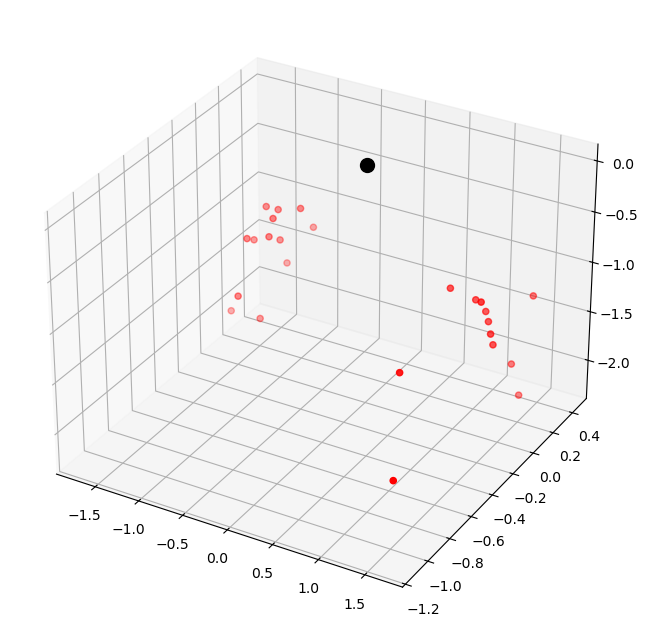

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0,0,0, color = 'black', s = 100, label = 'origin')

camx = []
camy = []
camz = []

for r, t in zip(rvecs1, tvec1):
    R , _ = cv2.Rodrigues(r)

    camera_position = -np.matrix(R).T * np.matrix(t)
    camx.append(camera_position[0].item())
    camy.append(camera_position[1].item())
    camz.append(camera_position[2].item())

ax.scatter(camx, camy, camz, color = 'red', label = 'camera_position')
    


Choice 5

In [ ]:
def enhance_img(gray):
    equalized_image = cv2.equalizeHist(gray)
    blurred = cv2.GaussianBlur(equalized_image, (5,5), 0)
    thres = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    return thres
    

square_size = 0.02 #2 cm
obj_pts = np.zeros((9*6, 3), np.float32)
obj_pts[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) * square_size


all_obj_pts = []
all_img_pts = []

auto_only_imgs = []

manual_only_imgs = []

def click_event(event, x, y, flags, param):
    current_img = param['img']
    current_name = param['name']
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print(x,y) # coordinate
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(current_img, f'{x}, {y}', (x,y), font, 1, (255,0,0), 2)
        cv2.imshow(window_name, current_img)
        param['point'].append([x,y])
    
    if event == cv2.EVENT_RBUTTONDBLCLK:
        print(x,y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        b,g,r = current_img[y,x] 
        cv2.putText(img,f'{b}, {g}, {r}', (x,y), font, 1, (255, 255,0), 2)
        cv2.imshow(window_name, current_img)
        #points += [x,y]

    #print(f"Manual Points: {param['point']}")



# linear interpolation
def linear_interpolation(pts, pattern_size):
    tl, tr, br, bl = np.array(pts[0],dtype = 'float32'),  np.array(pts[1],dtype = 'float32'), np.array(pts[2],dtype = 'float32'), np.array(pts[3],dtype = 'float32')
    #print(type(tl))
    cols, rows = pattern_size
    grid = []
    for row in range(rows):
        ver_int = row / (rows - 1)
        row_start = (1 - ver_int) * tl + ver_int * bl
        row_end = (1 - ver_int)*  tr + ver_int * br
        
        for col in range(cols):
            hor_int = col / (cols -1)
            point = (1 - hor_int) * row_start + hor_int * row_end
            grid.append(point)
    return np.array(grid, dtype= 'float32').reshape(-1, 1, 2)

pattern_size = (9,6)

window_name = 'chessboard_tool'
all_result = {}
# read input image
for idx in range(1,26):

    img = cv2.imread(f'img{idx}.jpg')

# convert the input image to a grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    # if chessboard corners are detected
    if ret == True:
    
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners,ret)
        all_img_pts.append(corners)
        auto_only_imgs.append(corners)
        all_obj_pts.append(obj_pts)

        cv2.imshow(window_name,img)
        cv2.waitKey(0)

    elif ret == False:
        # clicking (TL -> TR -> BR -> BL)
        gray = enhance_img(gray)
        print('Enchancement has been tried')
    
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

        if ret == True:
            print('Enchancement worked!')

    
        # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (9,6), corners,ret)
            all_img_pts.append(corners)
            auto_only_imgs.append(corners)
            all_obj_pts.append(obj_pts)

            cv2.imshow(window_name,img)
            cv2.waitKey(0)
        #-----
        elif ret == False:
            print('Enchancement has failed')

            manual_pts = []
            cv2.imshow(window_name, img)
            cv2.setMouseCallback(window_name, click_event, param= {'img': img, 'name': f'Image{idx},', 'point':manual_pts})
            cv2.waitKey(0)

            if len(manual_pts) == 4:
                interpolated_corners = linear_interpolation(manual_pts, (9,6))
                all_img_pts.append(interpolated_corners)
                manual_only_imgs.append(interpolated_corners)
                all_obj_pts.append(obj_pts)

                img_vis = img.copy()
                cv2.drawChessboardCorners(img_vis, (9,6), interpolated_corners, True)
                cv2.imshow(window_name, img_vis)
                print("Showing interpolated grid. Press any key to continue to next image.")
                cv2.waitKey(0) # Wait again so you can actually see the result
            
            else:
                print(f"Warning: Only {len(manual_pts)} points clicked. Skipping image {idx}.")
    
cv2.destroyWindow(window_name)



Enchancement has been tried
Enchancement has failed
Enchancement has been tried
Enchancement has failed
Enchancement has been tried
Enchancement has failed
Enchancement has been tried
Enchancement has failed
Enchancement has been tried
Enchancement has failed
